# Visualizing Regularization of ResNet18 Trained on CIFAR100

In this notebook I visualize torchvisions' ResNet18 models trained on the CIFAR100 dataset using various regularization techniques. The CIFAR100 data is preprocessed by normalizing using mean [0.5071, 0.4865, 0.4409] and variance [0.2009, 0.1984, 0.2023]. The batch size is 100. The model optimizes using SGD with momentum p = 0.9, and standard cross-entropy loss. Models are trained with no regularization, L2 regularization, SVB regularization and Jacobian regularization (there is no dropout for the standard ResNet models). The weights area initialized by the pytorch standard. The L2 regularization coefficient and Jacobian regularization coefficient are the same as in Hoffman 2019: l2_lmbd = 0.0005 and lambda_jacobian_reg = 0.01. For SVB regularization I use the hyperparameters svb_freq=600 and svb_eps = 0.05. The learning rate starts at 0.1, and is reduced to 0.01 and 0.001 1/3 and 2/3s into training, respectively. The models are trained for 50 epochs.

### Imports and Model Loading

In [1]:
import jupyter_black
import torch
from torchsummary import summary

from data_generators import data_loader_CIFAR100
from model_classes import ResNet18
from plotting_tools import (
    plot_results,
    plot_reg_results,
    plot_decision_boundary,
    plot_and_print_img,
    generate_random_vectors,
    get_random_img,
    plot_fgsm,
    plot_multiple_fgsm,
    plot_pgd,
    plot_multiple_pgd,
)
from tools import ModelInfo

jupyter_black.load()

In [2]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST data
train_loader, test_loader = data_loader_CIFAR100()

# Summary of model
summary_model = ResNet18().to(device)
summary(summary_model, (3, 32, 32))

Files already downloaded and verified
Files already downloaded and verified


c:\ProgramData\Anaconda3\envs\bioai\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\bioai\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [-1, 6

In [6]:
# Load models
dataset = "cifar100"
model_names = [
    "model_no_reg_7",
    "model_l2_7",
    "model_jacobi_7",
    "model_svb_7",
]
models = {name: ModelInfo(name, dataset) for name in model_names}

### Plots of Accuracy Curves

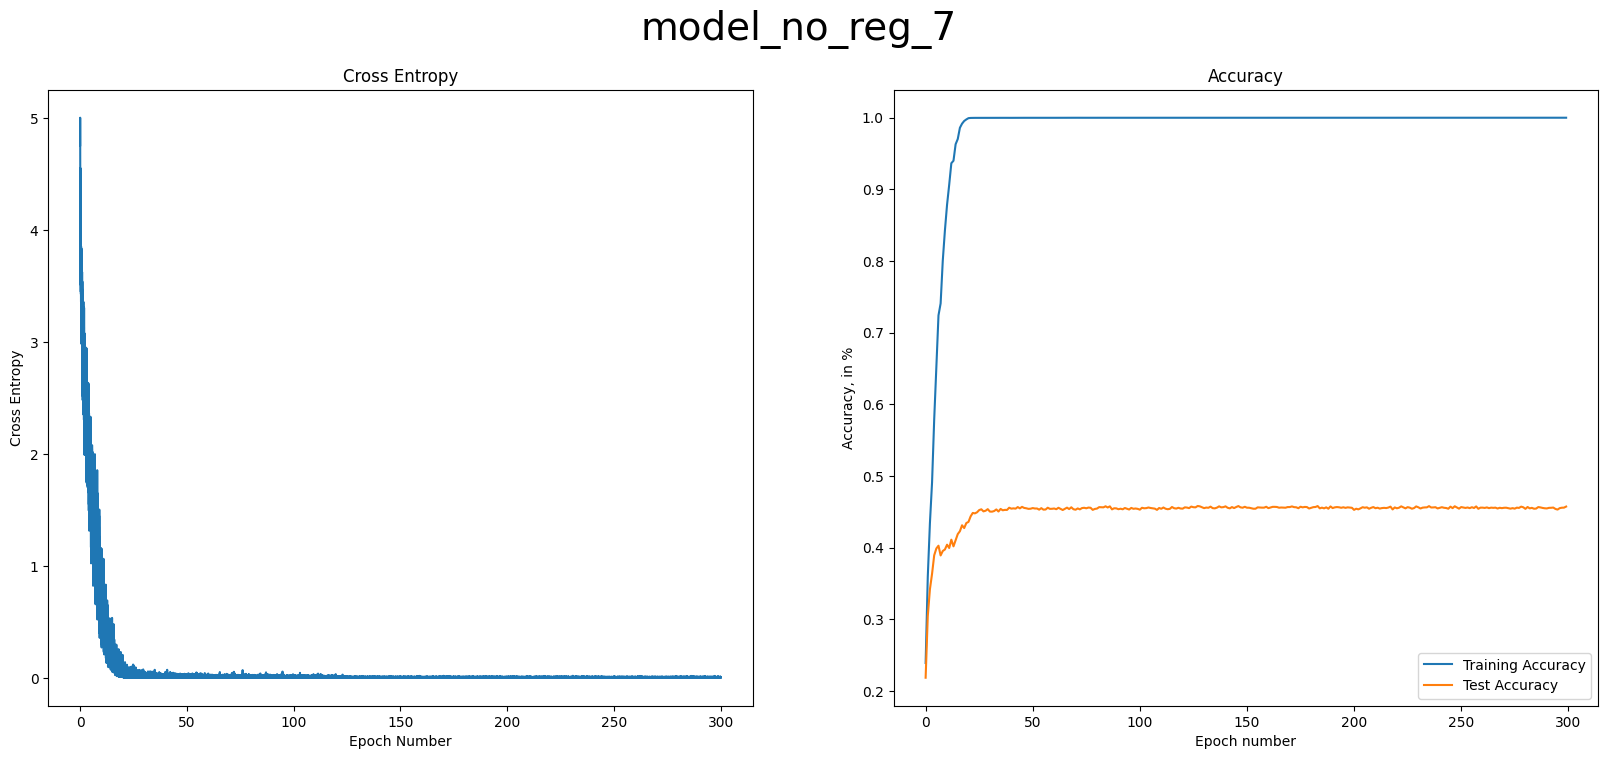

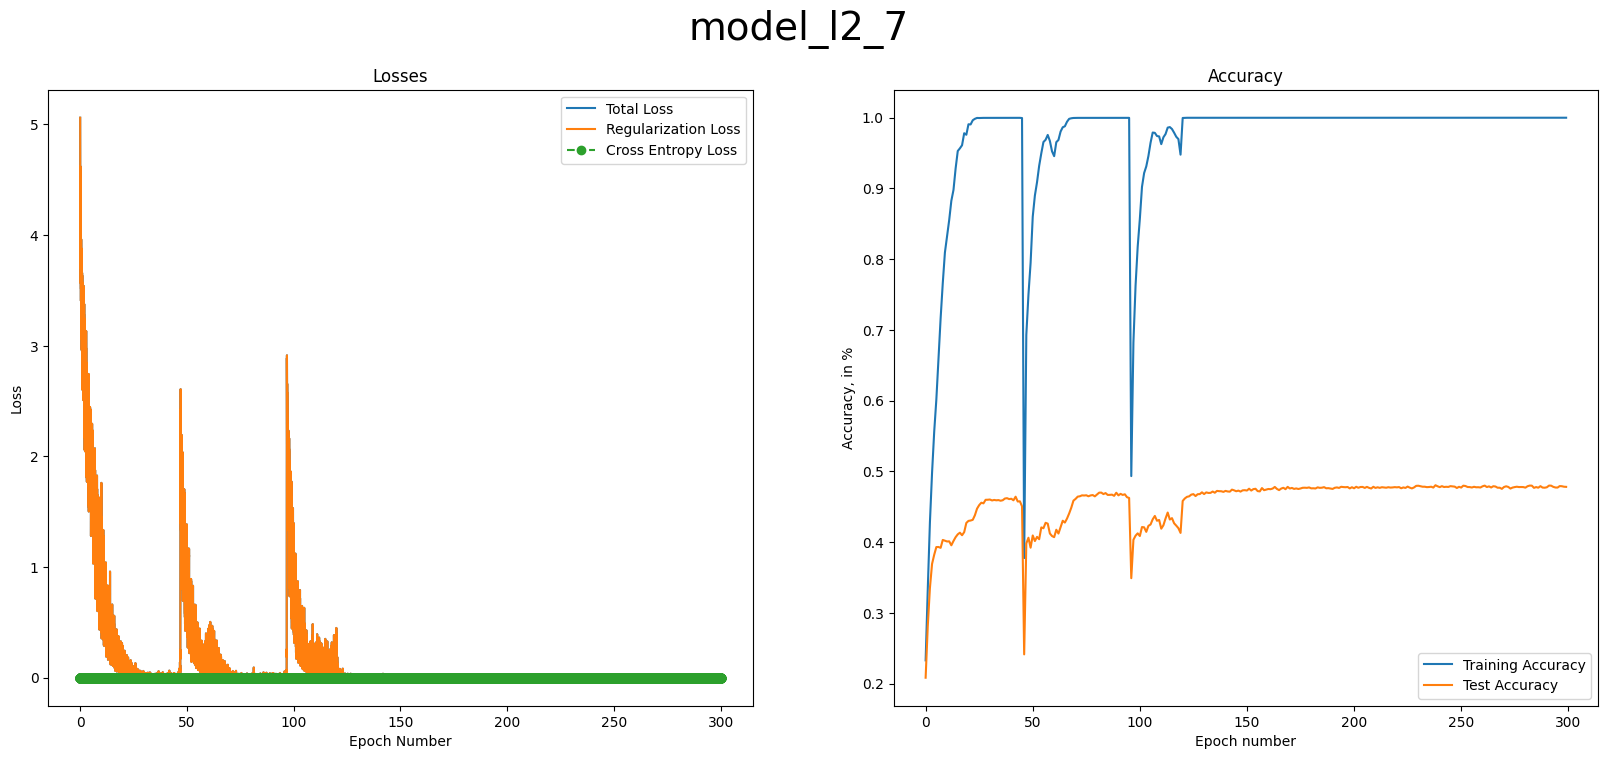

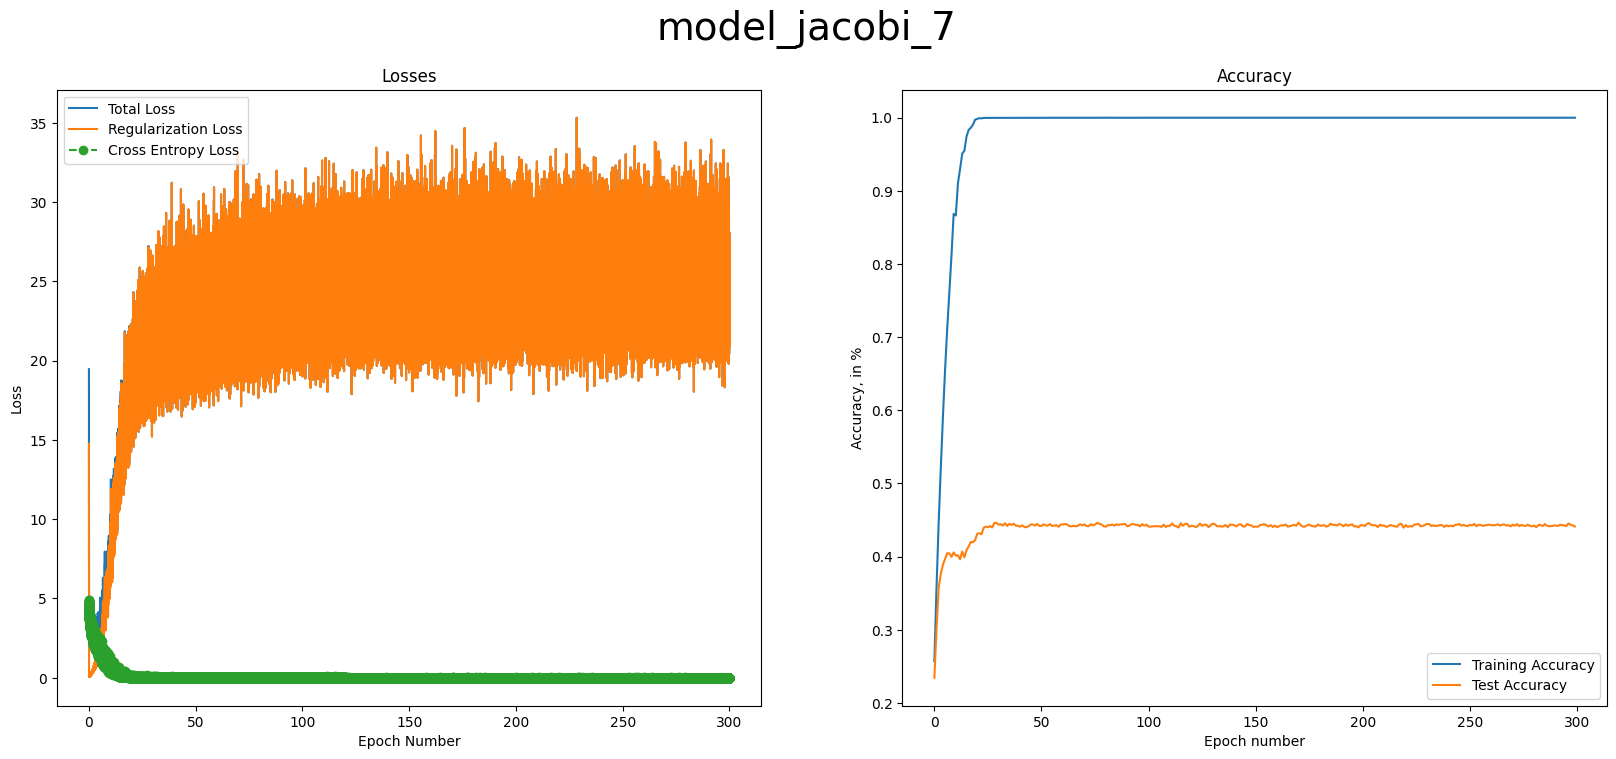

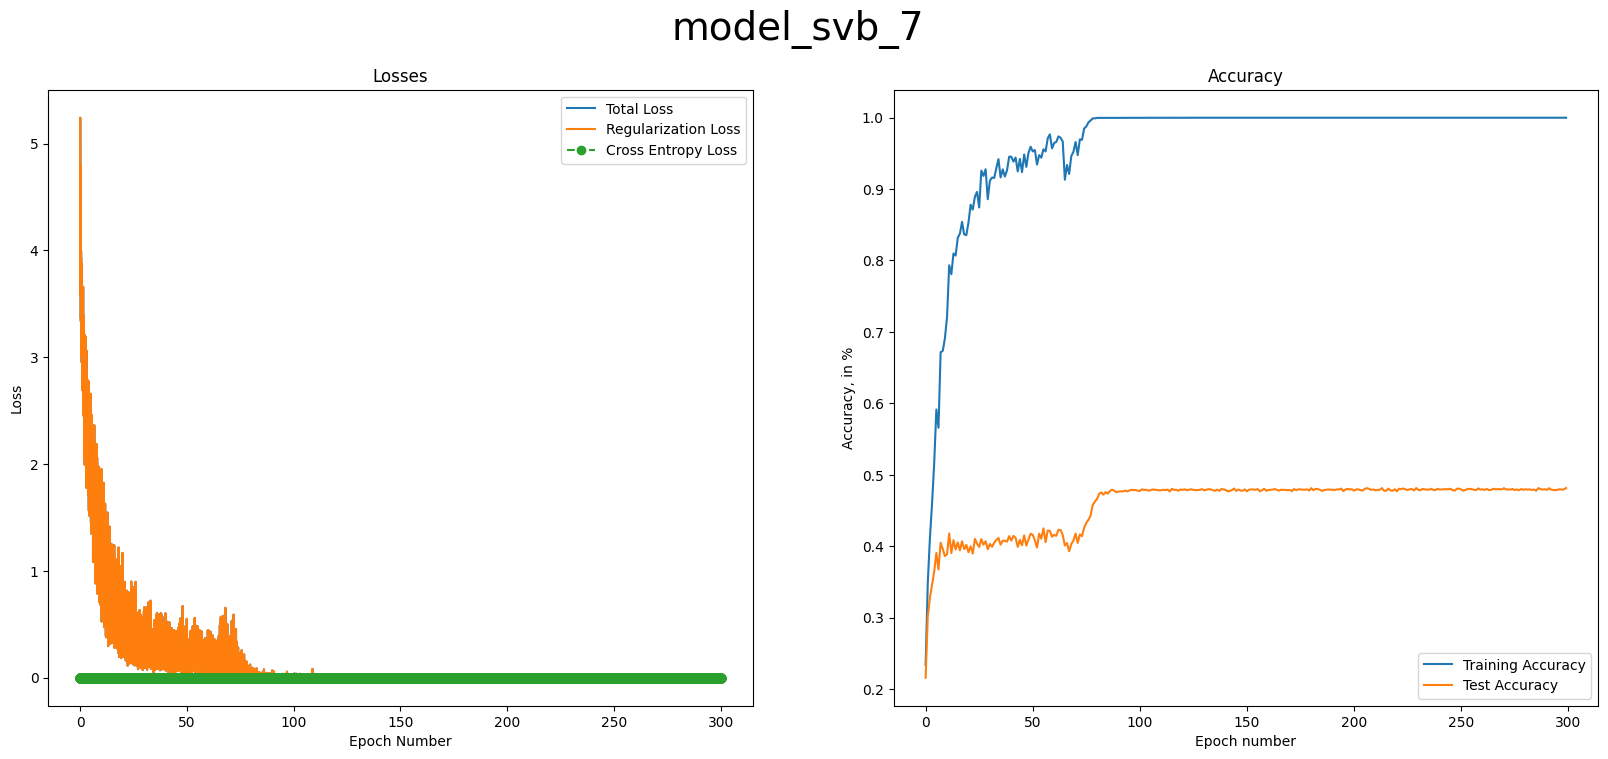

In [7]:
for model_name in model_names:
    if model_name.startswith("model_no_reg"):
        plot_results(models, model_name, title=f"{model_name}")
    else:
        plot_reg_results(models, model_name, title=f"{model_name}")

### Plots of Decision Boundaries

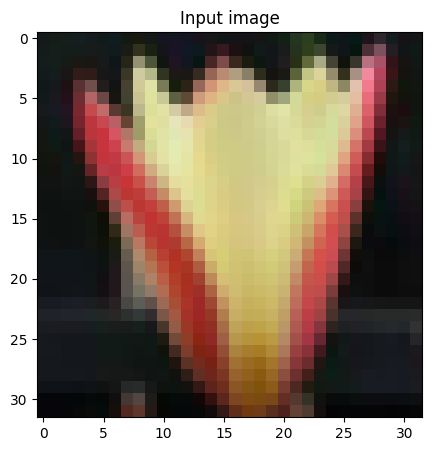

c:\ProgramData\Anaconda3\envs\bioai\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


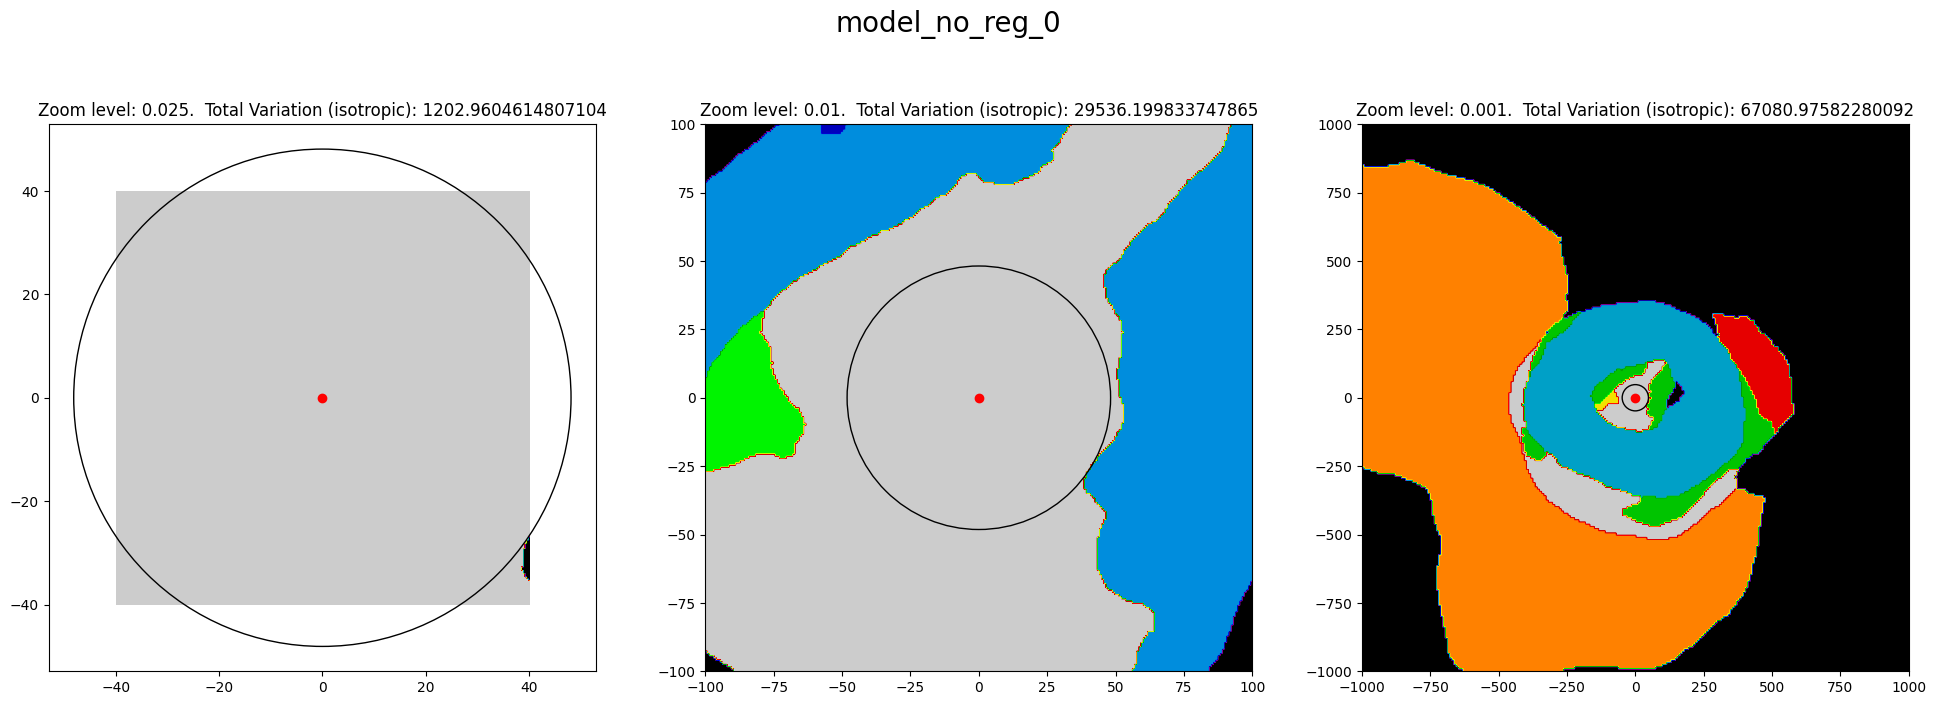

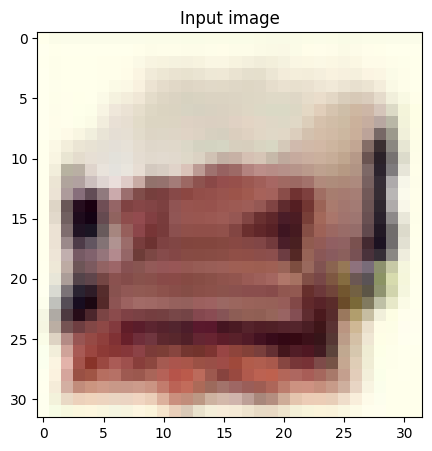

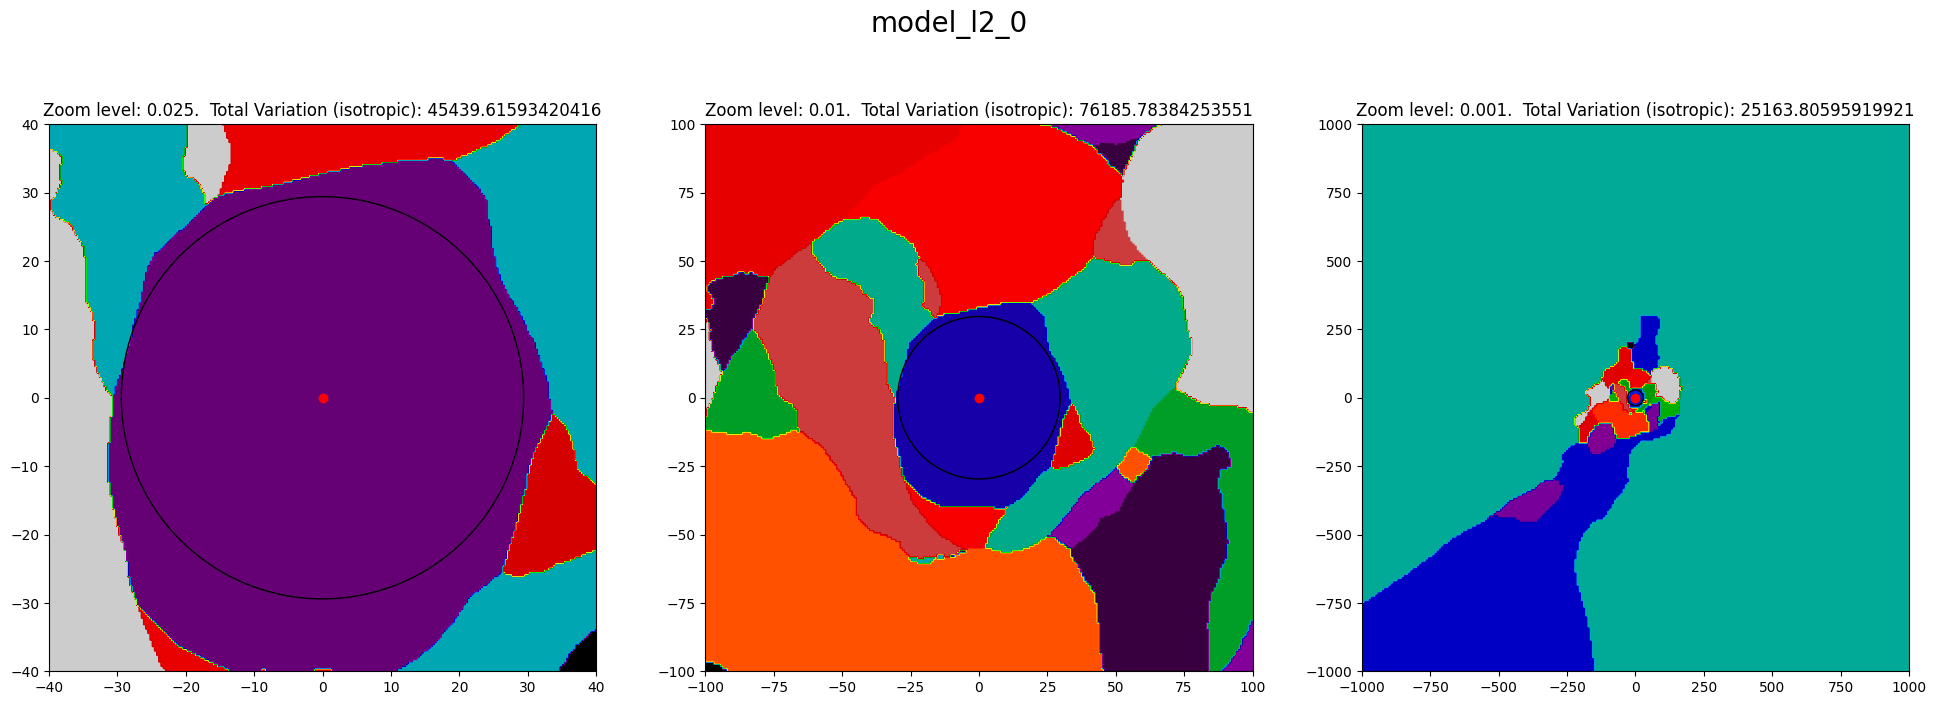

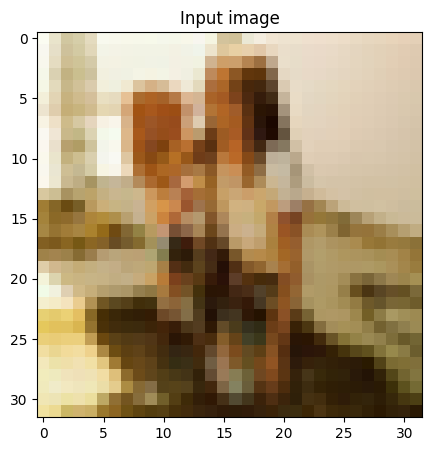

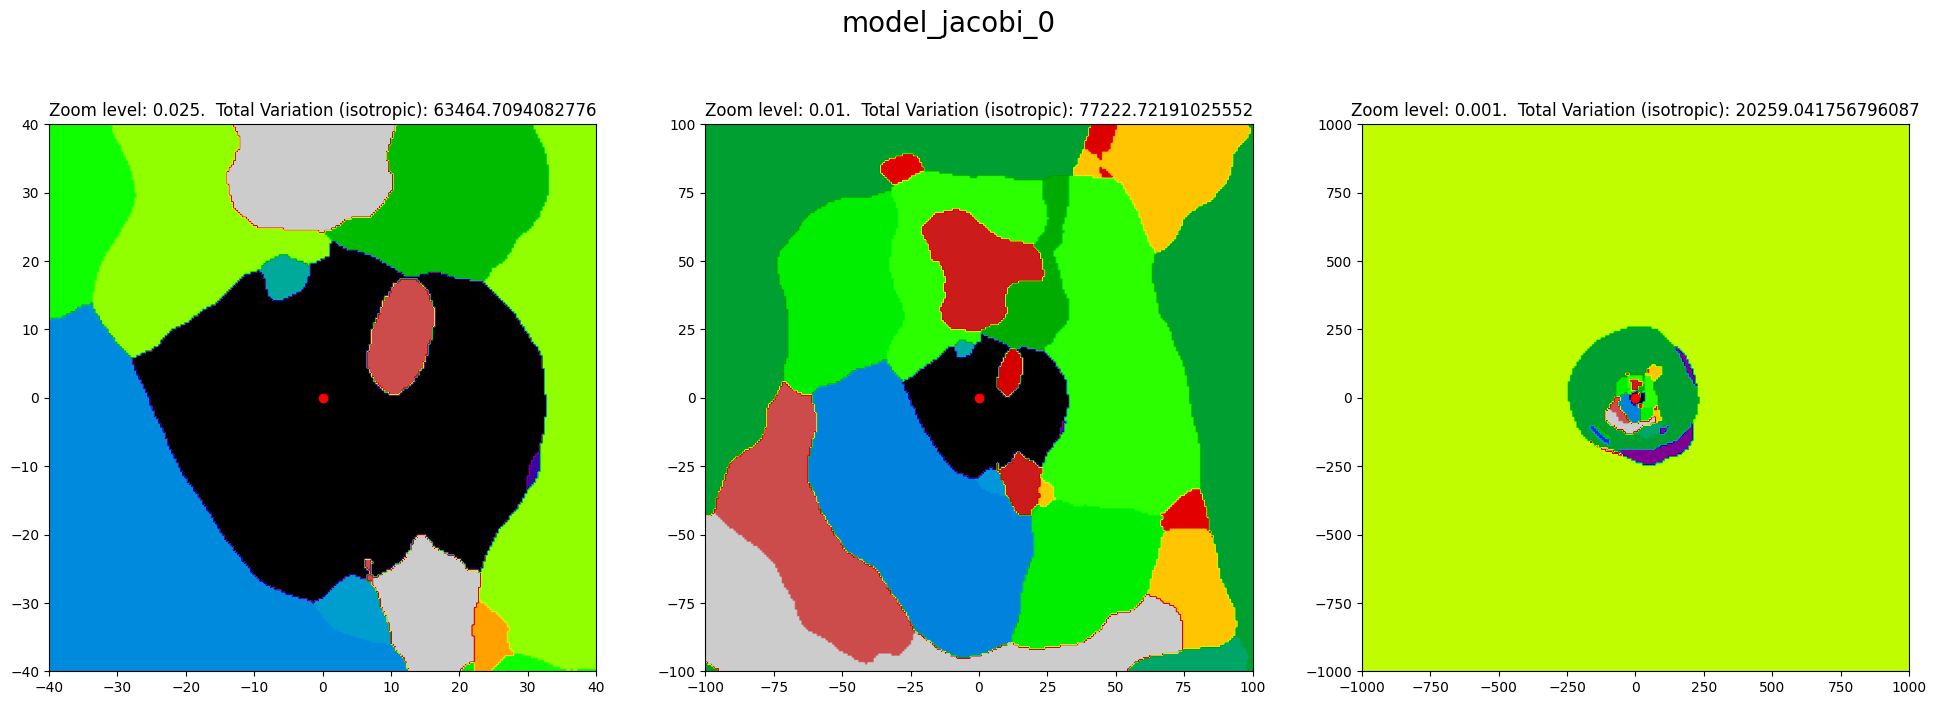

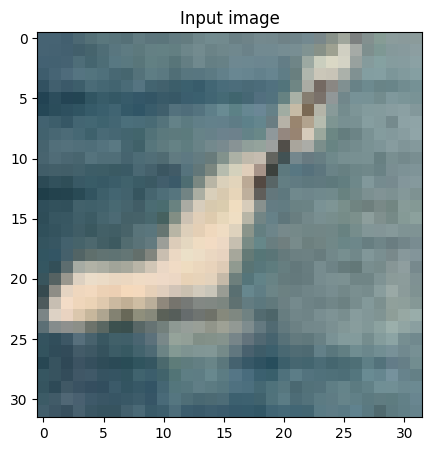

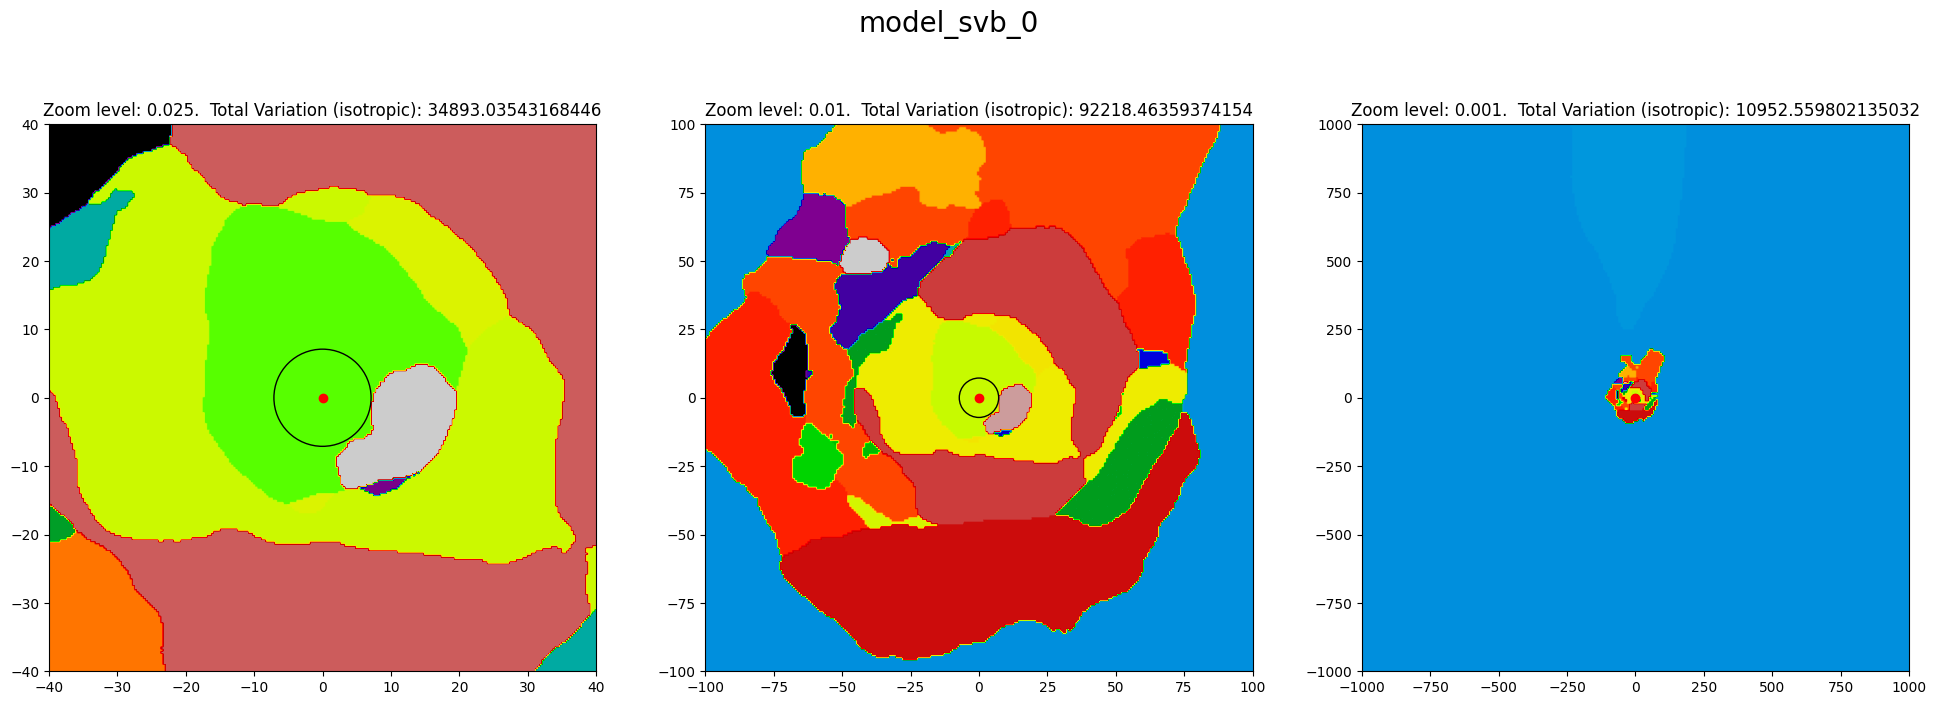

In [5]:
for model_name in model_names:
    image = get_random_img(test_loader)
    v1, v2 = generate_random_vectors(image)
    plot_and_print_img(
        image, models[f"{model_name}"].model, device, f"{model_name}", dataset
    )
    plot_decision_boundary(
        models[f"{model_name}"].model,
        image,
        v1,
        v2,
        device,
        resolution=250,
        dataset=dataset,
        title=f"{model_name}",
    )

### Plots of Results of FGSM Attacks

FGSM Attack Against Model: model_no_reg_0


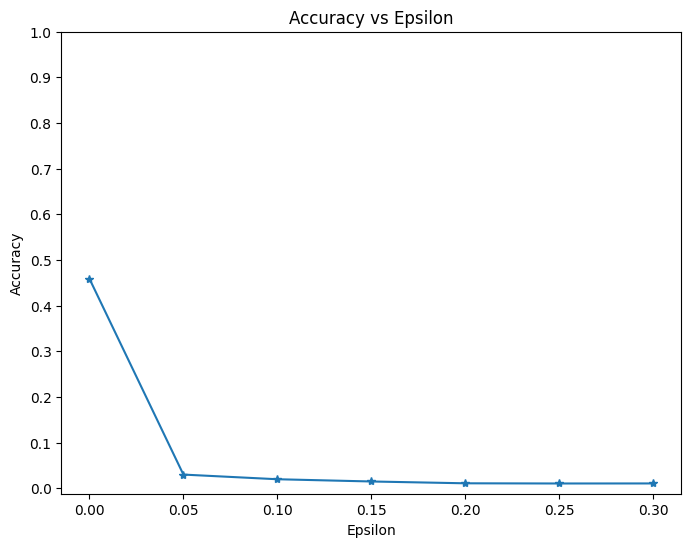

FGSM Attack Against Model: model_l2_0


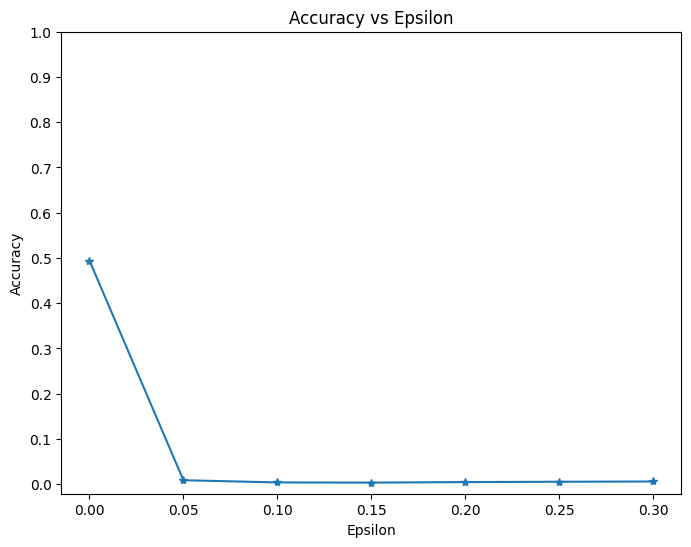

FGSM Attack Against Model: model_jacobi_0


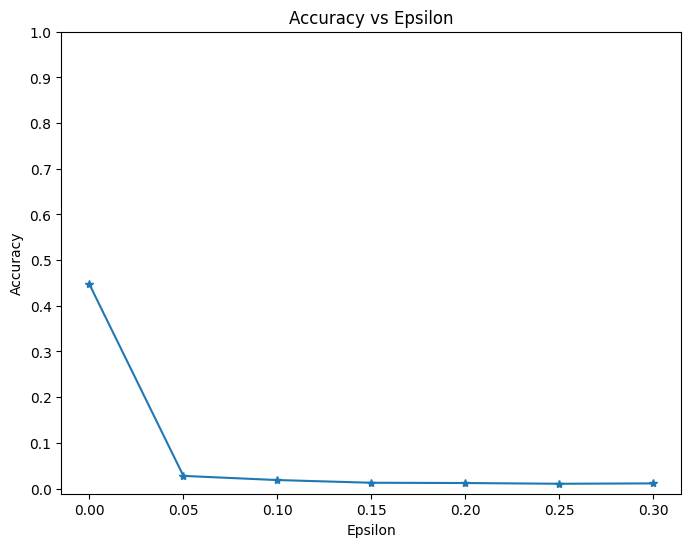

FGSM Attack Against Model: model_svb_0


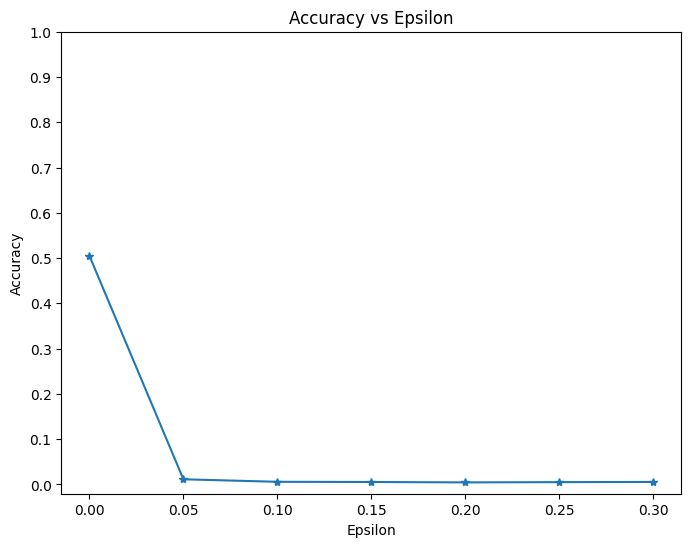

In [6]:
for model_name in model_names:
    print(f"FGSM Attack Against Model: {model_name}")
    plot_fgsm(models[f"{model_name}"].model, model_name, device, test_loader, dataset)

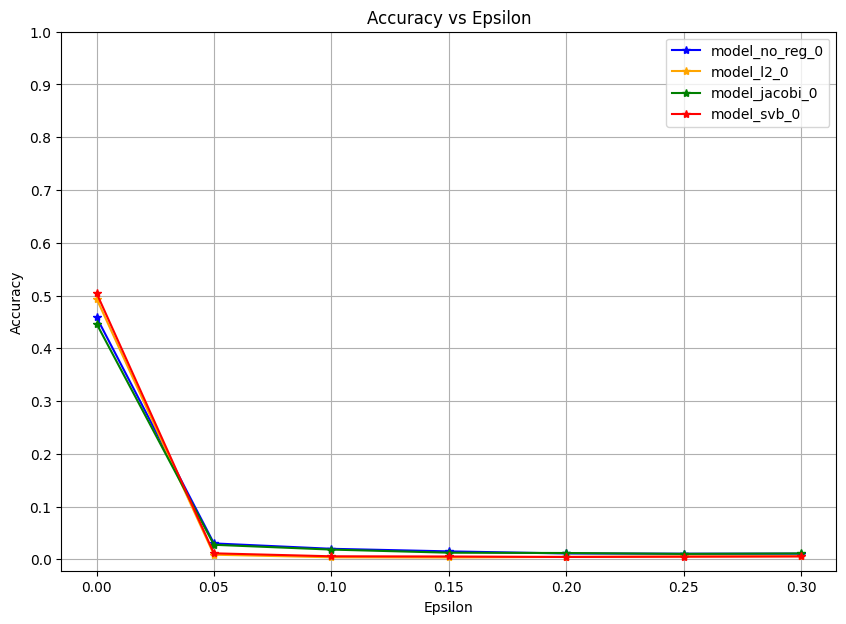

In [7]:
plot_multiple_fgsm(models, model_names, device, test_loader, dataset)

### Plots of Results of PGD Attacks

PGD Attack Against Model: model_no_reg_0


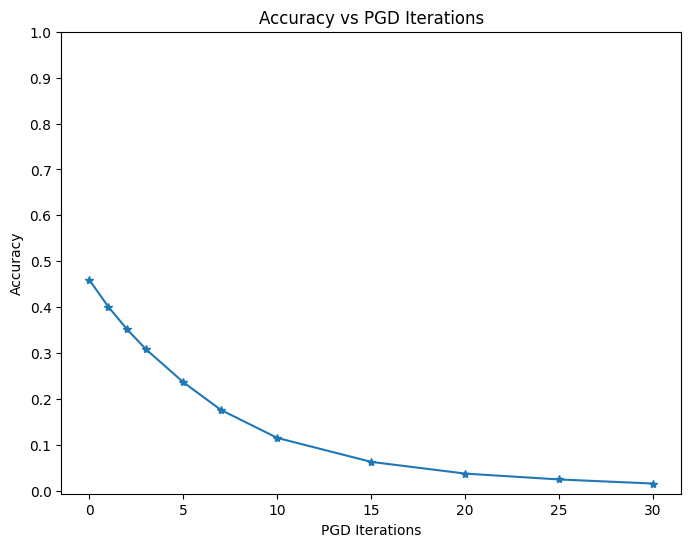

PGD Attack Against Model: model_l2_0


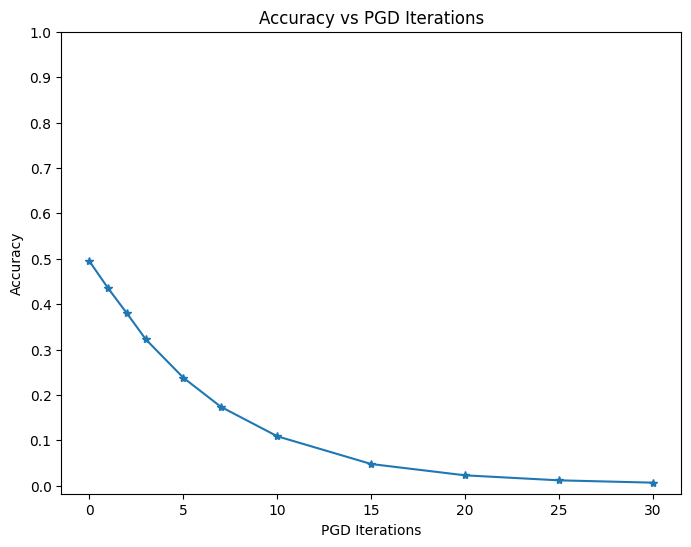

PGD Attack Against Model: model_jacobi_0


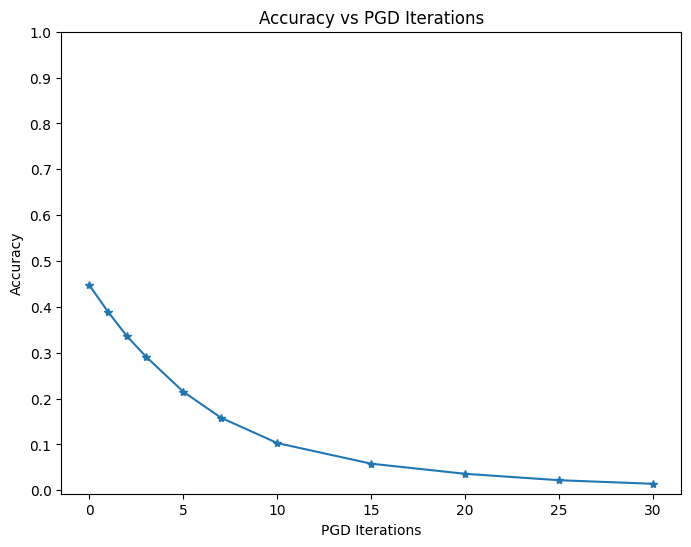

PGD Attack Against Model: model_svb_0


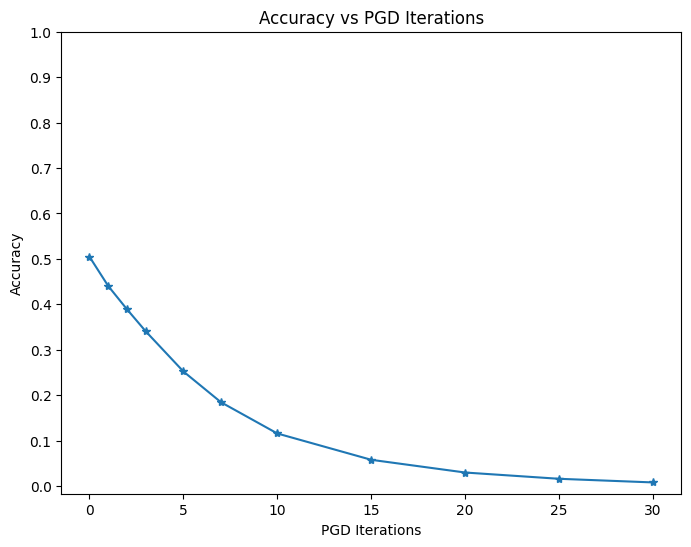

In [8]:
for model_name in model_names:
    print(f"PGD Attack Against Model: {model_name}")
    plot_pgd(
        models[f"{model_name}"].model,
        model_name,
        device,
        test_loader,
        dataset,
    )

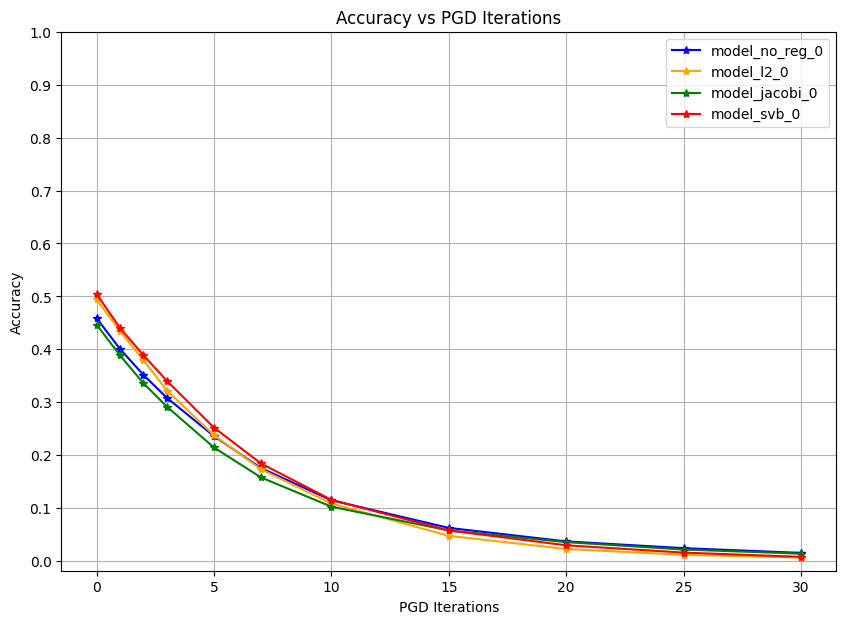

In [9]:
plot_multiple_pgd(models, model_names, device, test_loader, dataset)